# Powerline fire study
#### _Finding causes for the rise of wildfire caused by powerline in the US since 2008_

## The rise of powerline fire

### 1 - Set-up

In [28]:
#init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(palette='autumn') #fire theme :eyes:

import warnings
warnings.filterwarnings('ignore')

In [2]:
#data import
df = pd.read_csv('fires.csv', index_col = 'OBJECTID')
df.DISCOVERY_DATE = pd.to_datetime(df.DISCOVERY_DATE) #seting up date format
df.CONT_DATE = pd.to_datetime(df.CONT_DATE) #seting up date format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880465 entries, 1 to 1880465
Data columns (total 38 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   FOD_ID                      int64         
 1   FPA_ID                      object        
 2   SOURCE_SYSTEM_TYPE          object        
 3   SOURCE_SYSTEM               object        
 4   NWCG_REPORTING_AGENCY       object        
 5   NWCG_REPORTING_UNIT_ID      object        
 6   NWCG_REPORTING_UNIT_NAME    object        
 7   SOURCE_REPORTING_UNIT       object        
 8   SOURCE_REPORTING_UNIT_NAME  object        
 9   LOCAL_FIRE_REPORT_ID        object        
 10  LOCAL_INCIDENT_ID           object        
 11  FIRE_CODE                   object        
 12  FIRE_NAME                   object        
 13  ICS_209_INCIDENT_NUMBER     object        
 14  ICS_209_NAME                object        
 15  MTBS_ID                     object        
 16  MTBS_FIRE_NAME    

In [5]:
#getting ride of unused column
df.drop(['FPA_ID', 'SOURCE_SYSTEM', 'SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME','LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'OWNER_CODE', 'OWNER_DESCR', 'FIPS_CODE', 'Shape'], axis=1, inplace=True) #keeping name for further research in newspapers

In [14]:
#getting ride of other fire cause
df_powerline = df.drop(df.loc[df['STAT_CAUSE_DESCR'] != 'Powerline'].index)
df_powerline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 173028 to 1880225
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FOD_ID            14448 non-null  int64         
 1   FIRE_NAME         10815 non-null  object        
 2   MTBS_FIRE_NAME    179 non-null    object        
 3   COMPLEX_NAME      29 non-null     object        
 4   FIRE_YEAR         14448 non-null  int64         
 5   DISCOVERY_DATE    14448 non-null  datetime64[ns]
 6   DISCOVERY_DOY     14448 non-null  int64         
 7   DISCOVERY_TIME    8462 non-null   float64       
 8   STAT_CAUSE_CODE   14448 non-null  float64       
 9   STAT_CAUSE_DESCR  14448 non-null  object        
 10  CONT_DATE         8427 non-null   datetime64[ns]
 11  CONT_DOY          8427 non-null   float64       
 12  CONT_TIME         7826 non-null   float64       
 13  FIRE_SIZE         14448 non-null  float64       
 14  FIRE_SIZE_CLASS

### 2 - Analysis

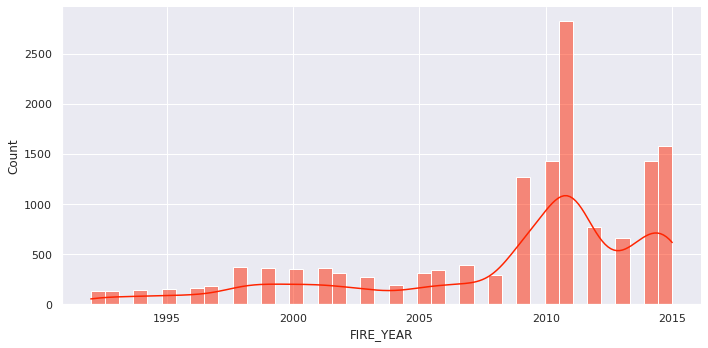

In [29]:
sns.displot(df_powerline['FIRE_YEAR'], kde=True, height=5, aspect=2,);

Obviously at first sight we have something around 2010.
- What's the average of powerline fire by year
- What's the year above this average ?
- Is that tendency true for every state ?